# Homework 7: Linear models.

*Instructions:*
Please answer the following questions and submit your work
by editing this jupyter notebook and submitting it on Canvas.
Questions may involve math, programming, or neither,
but you should make sure to *explain your work*:
i.e., you should usually have a cell with at least a few sentences
explaining what you are doing.

Also, please be sure to always specify units of any quantities that have units,
and label axes of plots (again, with units when appropriate).

In [41]:
import numpy as np
import matplotlib.pyplot as plt
rng = np.random.default_rng(123)

# 1. All models are wrong

Suppose that you have data that has *heteroskedasticity*:
the standard deviation is not constant:
$$\begin{aligned}
    X_I &\sim \text{Poisson}(\text{mean}=2) \\
    Y_i &\sim \text{Normal}(\text{mean}= a X_i + b, \text{sd}=a X_i / 4) .
\end{aligned}$$
Because of the heteroskedasticity, this does not satisfy the usual assumptions of a linear model.
However, you'd like to use the standard (least squares) linear model to analyze the data;
how well does this work in practice? To answer this question

*(a)* Write a function that simulates a dataset from the model above.
The sample size, $n$, should be an argument to the function,
as well as $a$ and $b$.

*(b)* Simulate one data set with $n=100$, $a=5$, and $b=1$,
and fit a (standard, least squares) linear model to the data.
You can use either the formula from class or scikit-learn.
Plot or otherwise depict the data and predicted values from the model
(e.g., the line on top of the scatter).

*(c)* Do the same thing as in (b) for at least 100 additional simulated datasets,
then report across these datasets how well the values of $a$ and $b$ were estimated
(i.e., how close the estimates were to the true values of $a=5$ and $b=1$).
Summarize the results.

**(a)**

In [45]:
def sim_data(n, a, b):
    X = np.random.poisson(lam=2, size=n)
    Y = np.random.normal(loc=a*X+b, scale=(a*X)/4)
    return np.column_stack([X, Y])

**(b)**

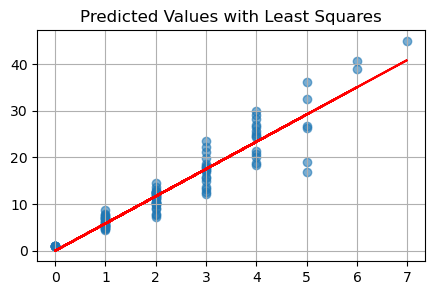

In [120]:
from sklearn.linear_model import LinearRegression

data = sim_data(n=100, a=5, b=1)
X = data[:, 0].reshape(-1, 1)
Y = data[:, 1].reshape(-1, 1)
model = LinearRegression(fit_intercept=True, positive=False)
model.fit(X, Y)
Y_pred = model.predict(X)

plt.figure(figsize=(5, 3))
plt.scatter(X, Y, alpha=0.6)
plt.plot(X, Y_pred, color='red')
plt.title("Predicted Values with Least Squares")
plt.grid(True)
plt.show()

**(c)**  Do the same thing as in (b) for at least 100 additional simulated datasets,
then report across these datasets how well the values of $a$ and $b$ were estimated
(i.e., how close the estimates were to the true values of $a=5$ and $b=1$).
Summarize the results.

In [96]:
slopes = []
intercepts = []

for i in range(100):
    data = sim_data(n=100, a=5, b=1)
    X = data[:, 0].reshape(-1, 1)
    Y = data[:, 1].reshape(-1, 1)
    Y_pred = LinearRegression(fit_intercept=True, positive=False)
    model = LinearRegression()
    model.fit(X, Y)
    slopes.append(model.coef_[0][0])
    intercepts.append(model.intercept_[0])

slopes = np.array(slopes)
intercepts = np.array(intercepts)

print(f"average estimated slope: {slopes.mean():.4f} (true value: 5)")
print(f"standard deviation of slope estimates: {slopes.std():.4f}")
print(f"average estimated intercept: {intercepts.mean():.4f} (true value: 1)")
print(f"Standard deviation of intercept estimates: {intercepts.std():.4f}")

average estimated slope: 5.0688 (true value: 5)
standard deviation of slope estimates: 0.3575
average estimated intercept: 0.9309 (true value: 1)
Standard deviation of intercept estimates: 0.5058


# 2. Eyecatchers

Colleagues in web design have proposed adding dynamic eyecatchers to your web page:
specifically, animated ducks that dance across the screen.
You're skeptical that this is a good idea, but run a small study:
sixty-five randomly chosen visitors get shown a random number of ducks,
and you record how many seconds the visitors stay on the page.
Here are the data:

In [70]:
num_ducks = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])
num_seconds = np.array([22.5, 10.1, 31.2, 29.4, 26.9, 39.2, 17.1, 17.1, 34. , 11.4,  0.3,
        9.2, 17.9, 16.6, 11.6, 34.6, 14.3, 29.2, 11.2, 26. , 25. , 12.6,
       19.6,  6.8, 14.7, 12.2,  2.1, 14. , 12.3, 15.8, 16.9, 10.3,  6.3,
        9.8,  0. , 11.3,  7.4,  7.2,  5.7,  4.9,  3.4,  7.4,  2.9,  4.3,
        6.3,  5.5,  7.2, 10.7,  6.5,  9. ,  1. ,  1. ,  1. ,  1. ,  1. ,
        1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ])

*(a)* Fit a linear model to these data
    to predict how the average amount of time spent on the site
    depends on the number of seconds.
    You may use either of the methods shown in class:
    scikit-learn or direct use of the formula.
 
*(b)* Plot or otherwise display the data and the relationship predicted by the model.

*(c)* What are your recommendations, based on this result?
    Be sure to give the basis for your recommendation,
    including the type of model and the result.

**(a)** Fit a linear model to data

In [74]:
X = num_ducks.reshape(-1, 1)
y = num_seconds

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

print(f"Slope (seconds per duck): {model.coef_[0]:.4f}")
print(f"Intercept: {model.intercept_:.4f}")

Slope (seconds per duck): -4.9592
Intercept: 19.9692


**(b)** Plot

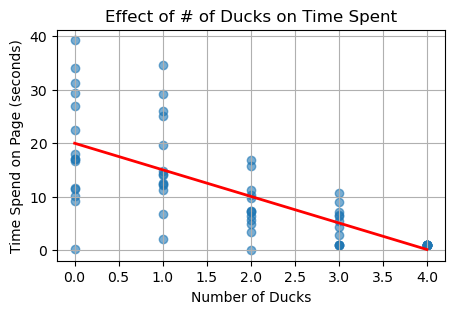

In [126]:
plt.figure(figsize=(5, 3))
plt.scatter(num_ducks, num_seconds, alpha=0.6)
plt.plot(num_ducks, y_pred, color='red', linewidth=2)
plt.xlabel("Number of Ducks")
plt.ylabel("Time Spend on Page (seconds)")
plt.title("Effect of # of Ducks on Time Spent")
plt.grid(True)
plt.show()

**(c)** My recommendation is to not have dynamic eyecatchers on the page as they clearly have a negative effect on the amount of time
spent on the page. The model is a simple linear regression via sci-kit learn, with the analysis showing a negative correlation (as the number of ducks rise, the time spent on page decreases). If the goal is to increase engagement, reduce the number of ducks

# 3. More mosquitos

My kid's class all went camping,
and came home with mosquito bites.
Thanks to a post-trip poll,
we know how many mosquito bites
each of the 27 kids had.
Here are the numbers:

In [130]:
bites = np.array([4, 5, 4, 2, 4, 8, 4, 6, 7, 5, 4, 0, 5, 7, 5, 3, 2, 0, 3, 4, 5, 3, 6, 1, 2, 3, 5])

Furthermore, a parent has measured the concentration
of some volatile organics in each kids' breath.
Here are the concentrations for the 27 kids (in the same order as `bites`, above),
in units of parts per million (ppm):

In [133]:
odor = np.array([ 2.8,  4.4,  6.9,  2.3,  5.9, 10.2,  3.2,  7.6,  6.3,  4.5,  4.3,
                0. ,  8.2,  5.4,  7.6,  3.3,  3.9,  0.1,  2.7,  4.7,  2.1,  4.3,
               11.3,  1.7,  2.8,  2.9,  8.5])

Our goal is to determine how odor affects the number of bites.
To do this, we'll fit a *Poisson* model:
if $Y_i$ is the number of bites the $i^\text{th}$ kid got,
and $X_i$ is their "odor" value, then we want to fit:
$$\begin{aligned}
    Y_i \sim \text{Poisson}(\text{mean}= \exp(a X_i + b)) ,
\end{aligned}$$
i.e., find the values of $a$ and $b$ at which this model
best fits the data.
To do this:

*(a)* Write down (in math) the negative log-likelihood function:
    this should take $a$ and $b$ as arguments,
    and return the negative log likelihood of the data (i.e., of `bites` and `odor`)
    under the model above.

*(b)* Use your function from (a) and `scipy.optimize.minimize` to find
    the maximum likelihood estimates of $a$ and $b$.

*(c)* Showing how expected number of bites (using the MLE values of $a$ and $b$ from (b))
    increases with odor and how this compares to the observed number of bites
    (for instance, by plot of the data with a line for the expected number).

*Note:* we will cover this sort of model more next week,
but *you already know how to do this* - it's just doing maximum likelihood
to fit a model with two parameters.

**(a)** Negative log-liklihood function 
\begin{aligned}
-\log \mathcal{L}(a, b)
&= \sum_{i=1}^{n} \left[ \exp(a X_i + b) - Y_i(a X_i + b) + \log(Y_i!) \right]
\end{aligned}

**(b)**

In [138]:
from scipy.special import gammaln
from scipy.optimize import minimize

def neg_log_likelihood(params):
    a, b = params
    lambda_i = np.exp(a * odor + b)
    nll = np.sum(lambda_i - bites * (a * odor + b) + gammaln(bites + 1))
    return nll

initial_guess = [0, 0]  # start at a=0, b=0
result = minimize(neg_log_likelihood, initial_guess)

# Extract optimal parameters
a_hat, b_hat = result.x
print(f"MLE estimates:\na = {a_hat:.4f}\nb = {b_hat:.4f}")

MLE estimates:
a = 0.1294
b = 0.6948


**(c)**

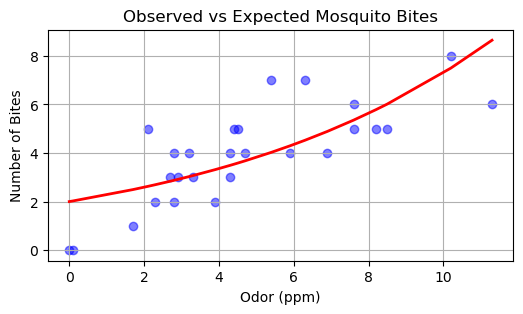

In [144]:
expected_bites = np.exp(a_hat * odor + b_hat)

plt.figure(figsize=(6, 3))
plt.scatter(odor, bites, color='blue', alpha=0.5)
plt.plot(np.sort(odor), expected_bites[np.argsort(odor)], color='red', linewidth=2)
plt.xlabel("Odor (ppm)")
plt.ylabel("Number of Bites")
plt.title("Observed vs Expected Mosquito Bites")
plt.grid(True)
plt.show()